In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
L = 4
t_max = 1

h = 1e-2
tau = 1e-3

k = 0.5  
alpha = 0

n_x = int(L / h) + 1
n_t = int(t_max / tau) + 1
u = np.zeros((n_t, n_x))

In [3]:
x = np.zeros((1, n_x))[0]
dx = np.zeros((1, n_x))[0]
t = np.zeros((1, n_t))[0]
dt = np.zeros((1, n_t))[0]

In [4]:
for i in range(len(x)):
    x[i] = i*h
    dx[i] = h
for i in range(len(t)):
    t[i] = i*tau
    dt[i] = tau

In [5]:
def T(x):
    return 1 + np.exp((-(x-2)**2) / 0.1)

def g(u):
    return k * (u**alpha)

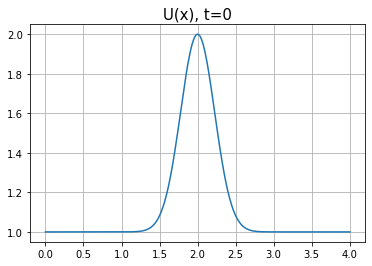

In [6]:
grid = np.linspace(0, 4, 500)
plt.plot(grid, T(grid))
plt.title('U(x), t=0', fontsize=15)
plt.grid()

In [7]:
# начальные условия
u[0] = T(x)
# граничные условия
u[:, 0] = 1
u[:, -1] = 1
u

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [10]:
P = np.zeros((n_t, n_x))
Q = np.zeros((n_t, n_x))
# P[1] = c[0] / b[0]
# Q[1] = -d[0] / b[0]
P[:, 1] = 0  
Q[:, 1] = 1


for i in range(1, n_t):
    for j in range(1, n_x-1):  
        A = (((u[i-1, j] + u[i-1, j-1]) / 2)**alpha) * (k / (0.5*(dx[j]+dx[j-1])*dx[j-1]))
        B = (((u[i-1, j] + u[i-1, j+1]) / 2)**alpha) * (k / (0.5*(dx[j]+dx[j-1])*dx[j]))
        C = A + B + (1 / tau)
        F = u[i-1, j] / tau

        P[i, j+1] = B / (C - A*P[i, j])
        Q[i, j+1] = (A*Q[i, j] + F) / (C - A*P[i, j])
        
    for j in range(n_x-1, 0, -1):
        u[i, j-1] = P[i, j] * u[i, j] + Q[i, j]
        

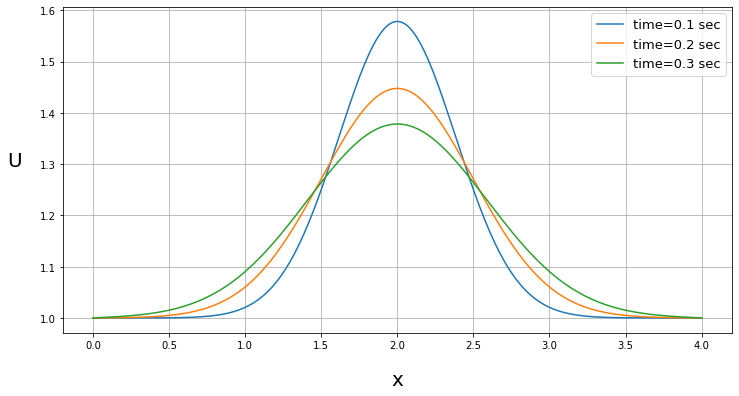

In [11]:
t1, t2, t3 = 0.1, 0.2, 0.3
i1, i2, i3 = int(len(t)*t1), int(len(t)*t2), int(len(t)*t3)

plt.figure(figsize=(12, 6))
plt.plot(x, u[i1, :], label=f'time={t1} sec')
plt.plot(x, u[i2, :], label=f'time={t2} sec')
plt.plot(x, u[i3, :], label=f'time={t3} sec')
plt.xlabel('x', fontsize=20, labelpad=20)
plt.ylabel('U', fontsize=20, rotation='horizontal', labelpad=25)
plt.legend(fontsize=13)
plt.grid()

**Нелинейная схема**

In [12]:
L = 4
t_max = 1

h = 1e-2
tau = 1e-3

k = 0.5  
alpha = 4

n_x = int(L / h) + 1
n_t = int(t_max / tau) + 1
u1 = np.zeros((n_t, n_x))

In [13]:
# начальные условия
u1[0] = T(x)
# граничные условия
u1[:, 0] = 1
u1[:, -1] = 1
u1

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [14]:
P = np.zeros((n_t, n_x))
Q = np.zeros((n_t, n_x))
# P[1] = c[0] / b[0]
# Q[1] = -d[0] / b[0]
P[:, 1] = 0  
Q[:, 1] = 1


for i in range(1, n_t):
    for j in range(1, n_x-1):        
        A = (((u1[i-1, j] + u1[i-1, j-1]) / 2)**alpha) * (k / (0.5*(dx[j]+dx[j-1])*dx[j-1]))
        B = (((u1[i-1, j] + u1[i-1, j+1]) / 2)**alpha) * (k / (0.5*(dx[j]+dx[j-1])*dx[j]))
        C = A + B + (1 / tau)
        F = u1[i-1, j] / tau

        P[i, j+1] = B / (C - A*P[i, j])
        Q[i, j+1] = (A*Q[i, j] + F) / (C - A*P[i, j])
        
    for j in range(n_x-1, 0, -1):
        u1[i, j-1] = P[i, j] * u1[i, j] + Q[i, j]
        

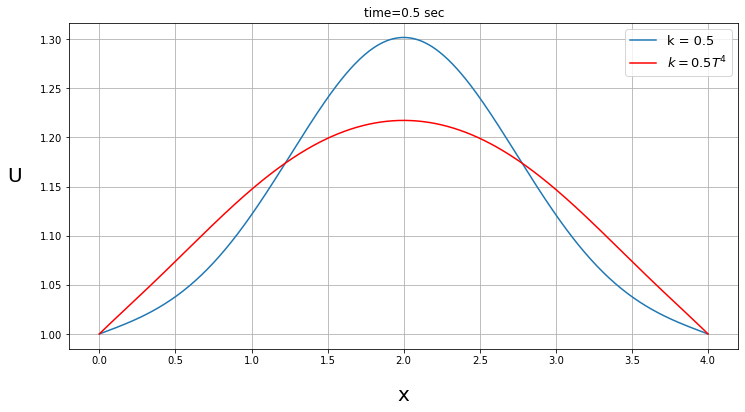

In [15]:
t1 = 0.5
i1 = int(len(t)*t1)

plt.figure(figsize=(12, 6))
plt.plot(x, u[i1, :], label='k = 0.5')
plt.plot(x, u1[i1, :], label=fr'$k = 0.5 T^{alpha}$', color='r')

plt.xlabel('x', fontsize=20, labelpad=20)
plt.ylabel('U', fontsize=20, rotation='horizontal', labelpad=25)
plt.title(f'time={t1} sec')
plt.legend(fontsize=13)
plt.grid()